In [1]:
pip install contractions wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)



ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\HUAWEI\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords,re
import contractions
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_classifier import LogisticRegression
from sklearn.classifier_selection import cross_val_score
from sklearn.classifier_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
df=pd.read_csv('train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
avg_length=df['comment_text'].apply(lambda x:len(x))
print("Average Length of a comment",avg_length.mean())

Average Length of a comment 394.0732213246768


In [ ]:
levels=[]
for col in df.columns:
    if df[col].dtype!= object:
        levels.append(col)
print(levels)    

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

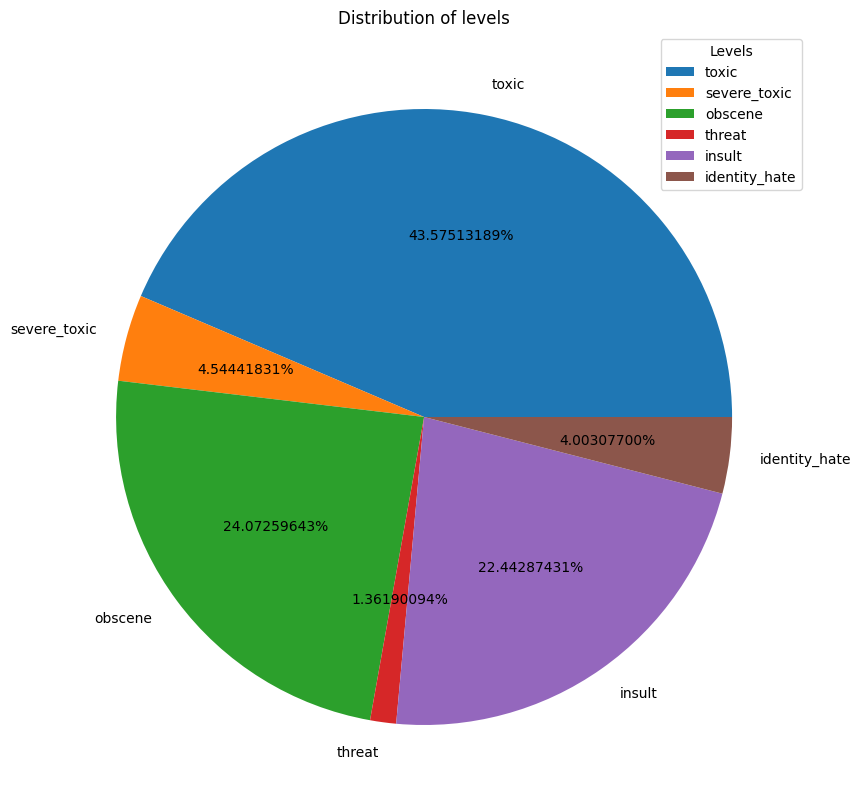

In [ ]:
sums={level:df[level].sum() for level in levels}

plt.figure(figsize=(10,10))
plt.pie(sums.values(),labels=sums.keys(),autopct='%0.8f%%')
plt.legend(sums.keys(),title="Levels")
plt.title('Distribution of levels')
plt.show()

In [ ]:
df=df.drop(labels='id',axis=1)

In [ ]:
df['comment_text']=df['comment_text'].str.lower()
df['comment_text']=df['comment_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
df['comment_text']

0         explanation\nwhy the edits made under my usern...
1         daww he matches this background colour im seem...
2         hey man im really not trying to edit war its j...
3         \nmore\ni cant make any real suggestions on im...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm theres no actual article for p...
159569    and it looks like it was actually you who put ...
159570    \nand  i really dont think you understand  i c...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
offensive_patterns = {
    "fuck": r"\b[f|ph|_|*][\W_]*[u|*|@|_][\W_]*[c|k|*|_][\W_]*[k|*|_](?:[e|*|r|_|*|s|ing]*)?\b",
    "shit": r"\b[s|$|5][\W_]*[h|*][\W_]*[i|!|*|1][\W_]*[t|*|+]\b",
    "bitch": r"\b[b|*|8][\W_]*[i|!|1|*][\W_]*[t|*][\W_]*[c|*][\W_]*[h|*](?:[s|*]*)?\b",
    "asshole": r"\b[a|@][\W_]*[s|$|*][\W_]*[s|$|*|5][\W_]*[h|*][\W_]*[o|0|*][\W_]*[l|*|1][\W_]*[e|*]\b",
    "cocksucker": r"\b[c|k][\W_]*[o|0][\W_]*[c|*][\W_]*[k|*][\W_]*[s|$][\W_]*[u|*][\W_]*[c|*][\W_]*[k|*][\W_]*[e|*][\W_]*[r|*]\b",
    "motherfucker": r"\b[m|*][\W_]*[o|0][\W_]*[t|*][\W_]*[h|*][\W_]*[e|*][\W_]*[r|*][\W_]*[f|ph][\W_]*[u|*|@][\W_]*[c|*][\W_]*[k|*][\W_]*[e|*][\W_]*[r|*]\b",
    "slut": r"\b[s|$][\W_]*[l|*][\W_]*[u|*][\W_]*[t|*]\b",
    "whore": r"\b[w|h|#][\W_]*[o|0|*][\W_]*[r|*][\W_]*[e|*]\b",
    "punk": r"\b[p|*][\W_]*[u|*][\W_]*[n|*][\W_]*[k|*]\b",
    "crap": r"\b[c|*][\W_]*[r|*][\W_]*[a|@][\W_]*[p|*]\b",
    "loser": r"\b[l|*][\W_]*[o|0|*][\W_]*[s|$][\W_]*[e|*][\W_]*[r|*]\b",
    "gay": r"\b[g|*][\W_]*[a|@][\W_]*[y|*]\b",
    "retarded": r"\b[r|*][\W_]*[e|*][\W_]*[t|*][\W_]*[a|@][\W_]*[r|*][\W_]*[d|*][\W_]*[e|*][\W_]*[d|*]\b",
    "dumb": r"\b[d|*][\W_]*[u|*][\W_]*[m|*][\W_]*[b|*]\b",
    "freak": r"\b[f|*][\W_]*[r|*][\W_]*[e|*][\W_]*[a|@][\W_]*[k|*]\b",
    "kill": r"\b[k|*][\W_]*[i|!][\W_]*[l|*|!][\W_]*[l|*|!]\b",
    "die": r"\b[d|*][\W_]*[i|!][\W_]*[e|*|3]\b",
    "hate": r"\b[h|*|#][\W_]*[a|@][\W_]*[t|*|+][\W_]*[e|*]\b",
    "ugly": r"\b[u|*][\W_]*[g|*][\W_]*[l|*][\W_]*[y|*]\b",
    "nerd": r"\b[n|*][\W_]*[e|*|3][\W_]*[r|*][\W_]*[d|*]\b",
    "sex": r"\b[s|5|$][\W_]*[e|3|*][\W_]*[x|*]\b",
    "dick": r"\b[d|*][\W_]*[i|!][\W_]*[c|*][\W_]*[k|*]\b",
    "fat": r"\b[f|*][\W_]*[a|@][\W_]*[t|*]\b",
    "stupid": r"\b[s|$|*][\W_]*[t|*|+][\W_]*[u|*][\W_]*[p|*][\W_]*[i|!][\W_]*[d|*]\b",
    "boobs": r"\b[b|8][\W_]*[o|0|*][\W_]*[o|0|*][\W_]*[b|8][\W_]*[s|$]\b",
    "nipple": r"\b[n|*][\W_]*[i|!|1][\W_]*[p|*][\W_]*[p|*][\W_]*[l|*|1][\W_]*[e|*]\b",
    "moron": r"\b[m|*][\W_]*[o|0][\W_]*[r|*][\W_]*[o|0|*][\W_]*[n|*]\b",
    "nigga": r"\b[n|*][\W_]*[i|1|!][\W_]*[g|*][\W_]*[g|*][\W_]*[a|@]\b"
}

In [ ]:
df['comment_text']=df['comment_text'].apply(lambda x:re.sub(r'@\w+','',x))
df['comment_text']=df['comment_text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '',x))
df['comment_text']=df['comment_text'].apply(lambda x: contractions.fix(x))

df

In [ ]:
for word,pattern in offensive_patterns.items():
    df['comment_text']=df['comment_text'].apply(lambda x: re.sub(pattern,word,x))

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_284\51989055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


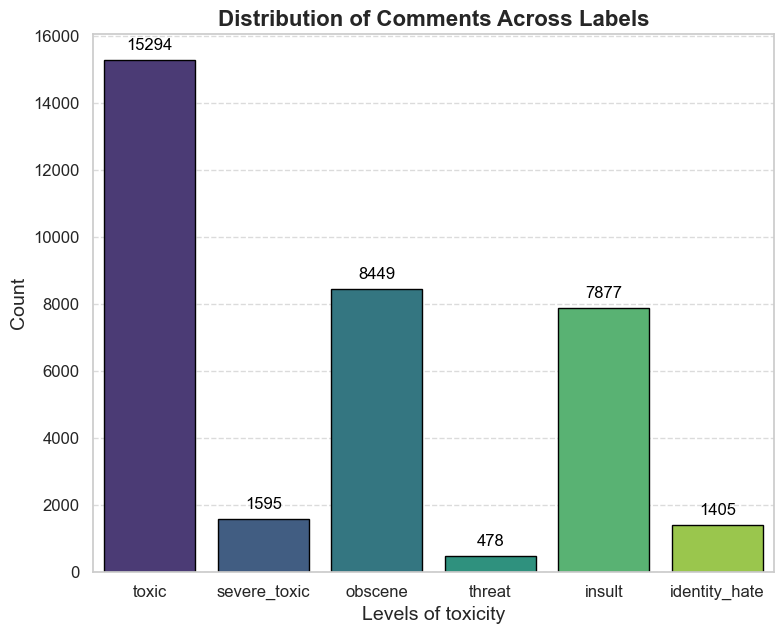

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6.5))

total_sum = df[levels].sum()
barplot = sns.barplot(
    x=total_sum.index,  
    y=total_sum.values,  
    palette='viridis',
    edgecolor='black'
)

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12, color='black', 
                     xytext=(0, 5),  
                     textcoords='offset points')

plt.title("Distribution of Comments Across Labels", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=14)
plt.xlabel("Levels of toxicity", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

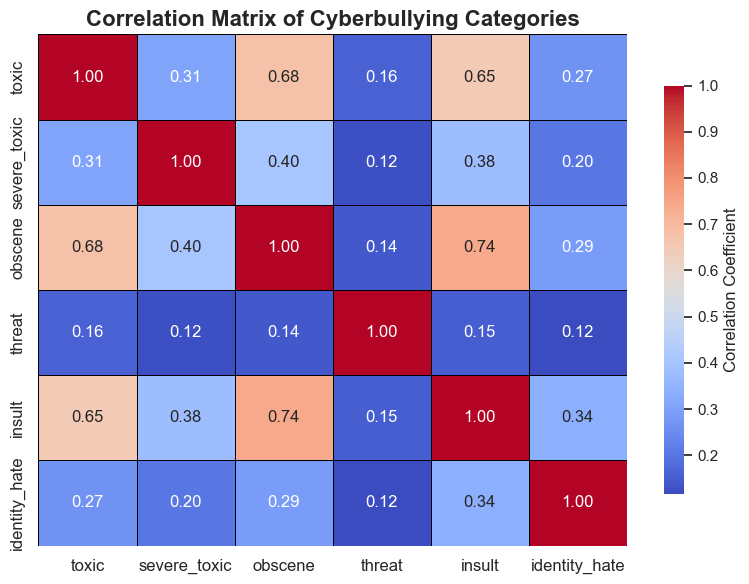

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[levels].corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
                      cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'}, 
                      linewidths=.5, linecolor='black')

plt.title("Correlation Matrix of Cyberbullying Categories", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df['Multi_level_comments']=df[levels].sum(axis=1)

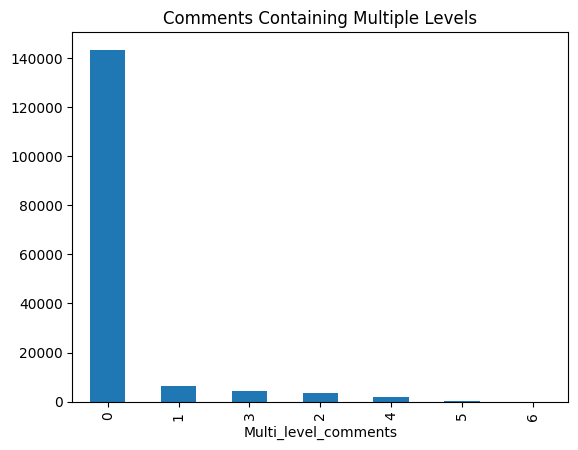

In [ ]:
df['Multi_level_comments'].value_counts().plot(kind='bar',title='Comments Containing Multiple Levels')
plt.show()

In [ ]:
def plot_words(column, width=720, height=520):
    if column not in levels:
        print("This columns does not exist",column)
        return
    text=' '.join(df[df[column]==1]['comment_text'])
    wordcloud_=WordCloud(width=width,height=height,background_color='black').generate(text)
    
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud_,interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word cloud for {column} comments')
    plt.show()
    
    word_frequencies=wordcloud_.words_
    #listing top 10 most frequently used words
    words=pd.DataFrame(word_frequencies,index=[0]).T[:10]
    words.reset_index(inplace=True)
    words.rename(columns={0:'Normalized Frequencies', 'index':'Word'}, inplace=True)
    words['Normalized Frequencies'] = words['Normalized Frequencies'] * 100
    print(f'Top 10 words used in {column} comments:')
    print(words.head(20))    

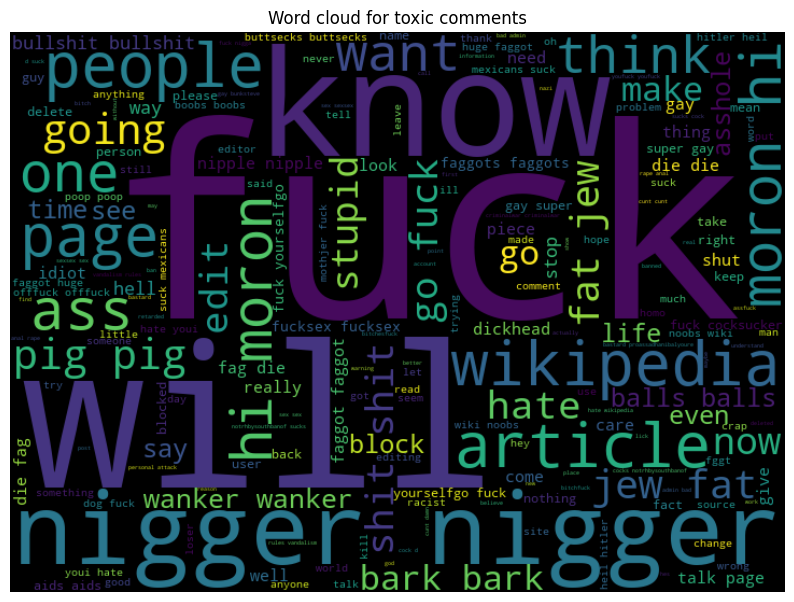

Top 10 words used in toxic comments:
            Word  Normalized Frequencies
0           fuck              100.000000
1           will               48.805601
2           know               44.007414
3  nigger nigger               41.495058
4      wikipedia               37.026359
5        article               36.552718
6         people               36.161450
7           page               32.104613
8            ass               31.054366
9       moron hi               30.374794


In [ ]:
plot_words("toxic")

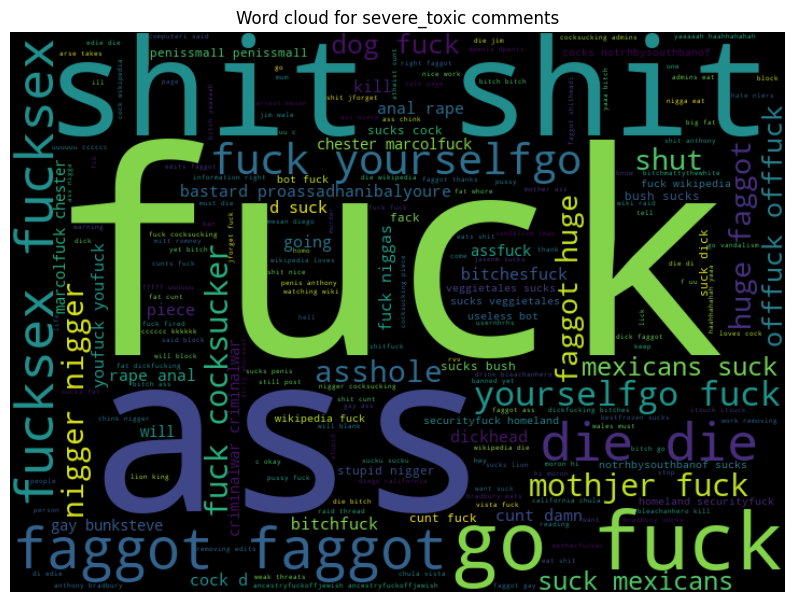

Top 10 words used in severe_toxic comments:
              Word  Normalized Frequencies
0             fuck              100.000000
1              ass               57.943385
2        shit shit               57.770075
3          go fuck               53.668400
4    faggot faggot               41.190064
5          die die               36.510687
6  fucksex fucksex               35.990757
7  fuck yourselfgo               35.875217
8  yourselfgo fuck               35.875217
9  fuck cocksucker               28.538417


In [ ]:
plot_words("severe_toxic")

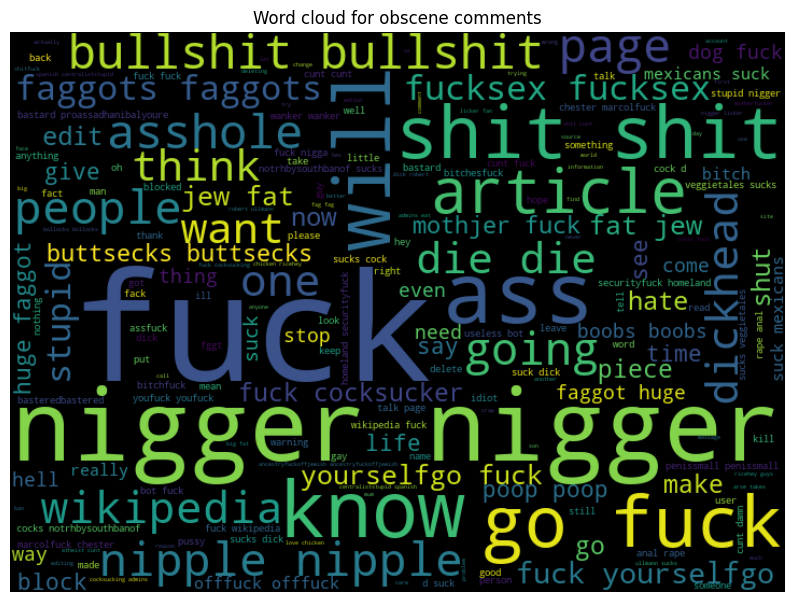

Top 10 words used in obscene comments:
                Word  Normalized Frequencies
0               fuck              100.000000
1      nigger nigger               44.520548
2                ass               31.462660
3               will               26.027397
4               know               25.961114
5          shit shit               25.298277
6            go fuck               25.033142
7            article               18.581529
8  bullshit bullshit               18.360583
9            asshole               18.316394


In [ ]:
plot_words("obscene")

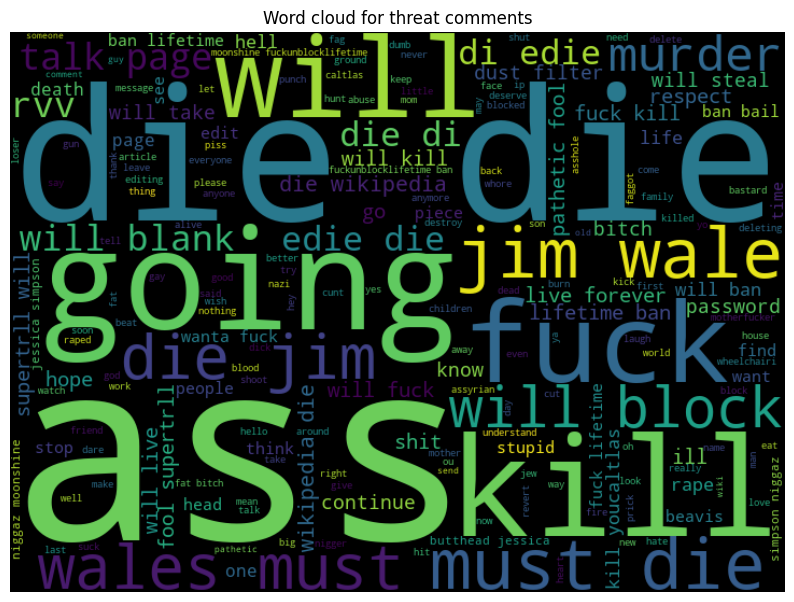

Top 10 words used in threat comments:
         Word  Normalized Frequencies
0         ass              100.000000
1     die die               83.486239
2       going               44.560944
3        kill               42.857143
4        fuck               25.819135
5        will               25.688073
6    must die               20.838794
7    jim wale               20.707733
8  wales must               20.445609
9     die jim               20.445609


In [ ]:
plot_words("threat")

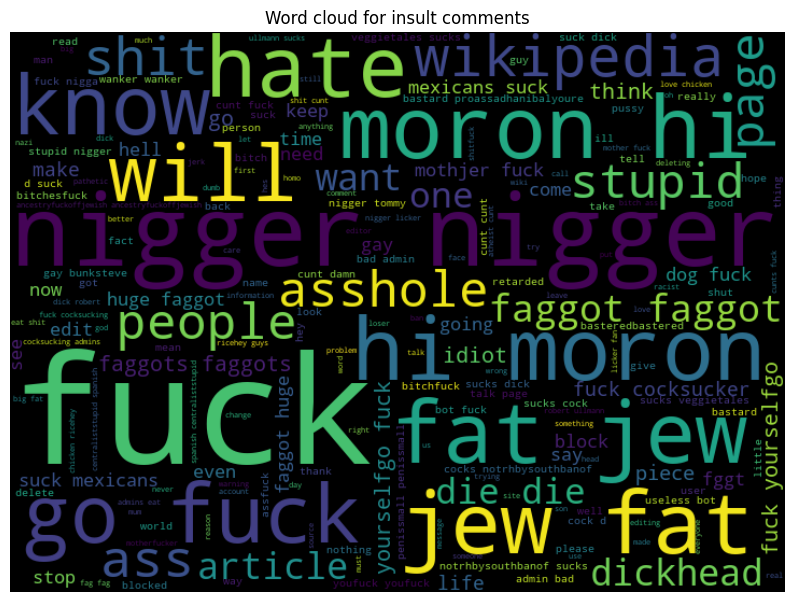

Top 10 words used in insult comments:
            Word  Normalized Frequencies
0           fuck              100.000000
1  nigger nigger               47.681564
2       moron hi               35.558659
3       hi moron               35.474860
4        jew fat               34.469274
5        fat jew               34.245810
6           hate               33.379888
7           know               31.787709
8        go fuck               30.949721
9           will               29.692737


In [ ]:
plot_words("insult")

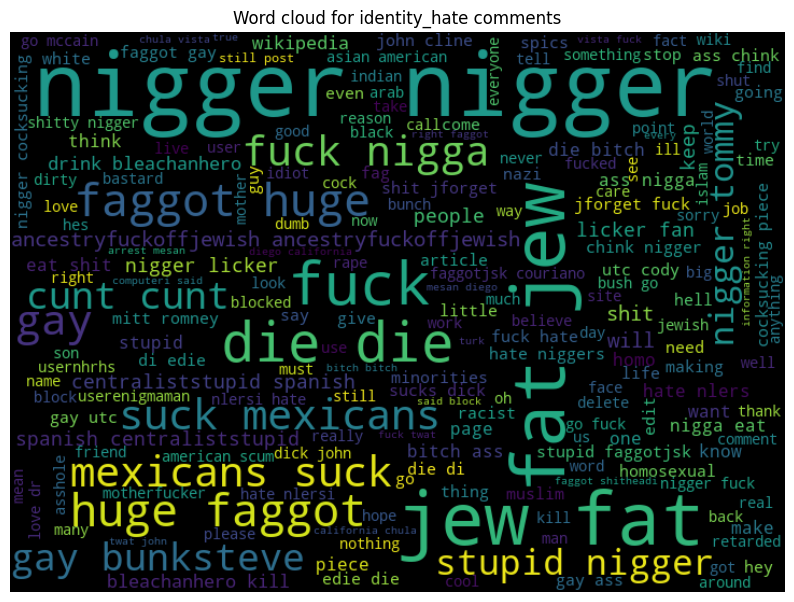

Top 10 words used in identity_hate comments:
            Word  Normalized Frequencies
0  nigger nigger              100.000000
1        jew fat               64.913204
2        fat jew               64.492372
3           fuck               39.347712
4        die die               33.350868
5    huge faggot               21.988427
6    faggot huge               21.883219
7            gay               20.199895
8  mexicans suck               18.726986
9  suck mexicans               18.674382


In [ ]:
plot_words("identity_hate")

In [ ]:
#column is the name of the column, length is the size of n grams (2,2) and n is the number of grams we want
def top_n_words(column,length,n):
    if column not in df.columns:
        return
    corpus=df[df[column]==1]['comment_text']
    vectors=CountVectorizer(ngram_range=length,max_features=n).fit(corpus)
    bag_of_words= vectors.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    #har word ki frquency 
    words_freq=[(word, sum_words[0, idx]) for word, idx in vectors.vocabulary_.items()]
    #count k hisaab se sort krenge
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    temp = words_freq[:n]
    temp = pd.DataFrame(temp)
    temp.rename(columns={0: "Words", 1:"Count"}, inplace=True)
    print(f"Top 10 {length} in {column}")
    print(temp.head(10))

In [ ]:
for level in levels:
    print(f"Displaying for {level} comments:")
    print(f"Top 10 bi-grams:")
    top_n_words(level, length=(2, 2), n=10)
    print("============================================================================")
    print(f"Top 10 tri-grams:")
    top_n_words(level, length=(3, 3), n=10)
    print("============================================================================")
    print("============================================================================")



Displaying for toxic comments:
Top 10 bi-grams:
Top 10 (2, 2) in toxic
           Words  Count
0        you are   6474
1         do not   4105
2       fuck you   3260
3  nigger nigger   2015
4       you fuck   1905
5         in the   1809
6         of the   1477
7       moron hi   1474
8       hi moron   1472
9         if you   1389
Top 10 tri-grams:
Top 10 (3, 3) in toxic
                  Words  Count
0  nigger nigger nigger   2006
1           hi moron hi   1468
2        moron hi moron   1466
3         fuck you fuck   1282
4          you fuck you   1275
5           pig pig pig   1248
6           fat jew fat   1226
7           jew fat jew   1224
8          you hate you   1124
9         hate you hate   1107
Displaying for severe_toxic comments:
Top 10 bi-grams:
Top 10 (2, 2) in severe_toxic
           Words  Count
0       fuck you   2530
1       you fuck   1483
2        you are   1323
3        you you   1015
4       you suck   1005
5      shit shit    999
6        go fuck    929
7  fuc

In [ ]:
def num_of_words_in_columns(column):
    if column not in df.columns:
        return
    filtered_comments=df[df[column]==1]['comment_text'].dropna()
    df['len']=filtered_comments.apply(lambda x:len(x.split()))
    print(f"Description of words in {column}")
    print(df['len'].describe())
    print(f"=========================")
    print("Info of words in {column}")
    print(df['len'].info())


In [ ]:
num_of_words_in_columns("toxic")
print("------------------------")
num_of_words_in_columns("severe_toxic")

Description of words in toxic
count    15294.000000
mean        51.214398
std        106.048964
min          2.000000
25%         11.000000
50%         22.000000
75%         48.000000
max       1403.000000
Name: len, dtype: float64
Info of words in {column}
<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: len
Non-Null Count  Dtype  
--------------  -----  
15294 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB
None
------------------------
Description of words in severe_toxic
count    1595.000000
mean       75.895925
std       186.652709
min         2.000000
25%         9.000000
50%        17.000000
75%        40.000000
max      1403.000000
Name: len, dtype: float64
Info of words in {column}
<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: len
Non-Null Count  Dtype  
--------------  -----  
1595 non-null   float64
dtypes: float64(1)
memory usage: 1.2 MB
None


In [ ]:
num_of_words_in_columns("obscene")
num_of_words_in_columns("insult")

Description of words in obscene
count    8449.000000
mean       49.627056
std       108.514980
min         2.000000
25%        10.000000
50%        20.000000
75%        45.000000
max      1403.000000
Name: len, dtype: float64
Info of words in {column}
<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: len
Non-Null Count  Dtype  
--------------  -----  
8449 non-null   float64
dtypes: float64(1)
memory usage: 1.2 MB
None
Description of words in insult
count    7877.000000
mean       48.400025
std       107.750017
min         2.000000
25%        10.000000
50%        21.000000
75%        44.000000
max      1403.000000
Name: len, dtype: float64
Info of words in {column}
<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: len
Non-Null Count  Dtype  
--------------  -----  
7877 non-null   float64
dtypes: float64(1)
memory usage: 1.2 MB
None


In [ ]:
num_of_words_in_columns("identity_hate")

Description of words in identity_hate
count    1405.000000
mean       52.100356
std       114.131025
min         2.000000
25%        10.000000
50%        21.000000
75%        46.000000
max      1247.000000
Name: len, dtype: float64
Info of words in {column}
<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: len
Non-Null Count  Dtype  
--------------  -----  
1405 non-null   float64
dtypes: float64(1)
memory usage: 1.2 MB
None


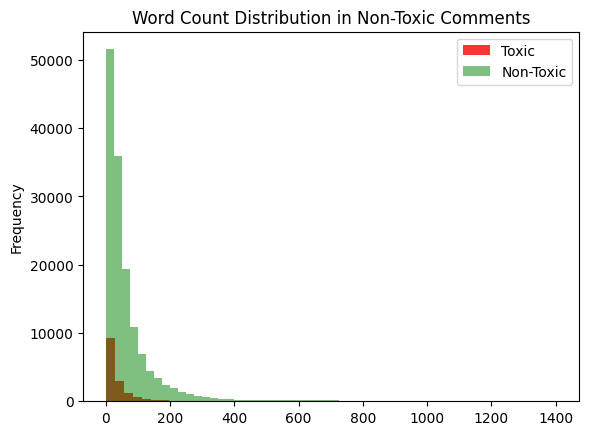

In [ ]:
df['word_count'] = df['comment_text'].apply(lambda x: len(x.split()))
df[df['toxic'] == 1]['word_count'].plot(kind='hist', bins=50, alpha=0.8, color='red', title="Word Count Distribution in Toxic Comments")
df[df['toxic'] == 0]['word_count'].plot(kind='hist', bins=50, alpha=0.5, color='green', title="Word Count Distribution in Non-Toxic Comments")
plt.legend(['Toxic', 'Non-Toxic'])
plt.show()

In [ ]:
print(df[df['Multi_level_comments']==0]['word_count'].describe())
print("\n")
print(df[df['Multi_level_comments']==0]['word_count'].info())


count    143346.000000
mean         67.723383
std          97.035031
min           0.000000
25%          17.000000
50%          37.000000
75%          77.000000
max        1250.000000
Name: word_count, dtype: float64


<class 'pandas.core.series.Series'>
Index: 143346 entries, 0 to 159570
Series name: word_count
Non-Null Count   Dtype
--------------   -----
143346 non-null  int64
dtypes: int64(1)
memory usage: 2.2 MB
None


In [ ]:
vectorized = TfidfVectorizer(ngram_range=(1,6),
                   min_df=3, max_df=0.9, strip_accents='unicode', use_idf=True,
                   analyzer='char',
                   stop_words='english',
                   smooth_idf=True,        
                   sublinear_tf=True,       
                   max_features=50000)

x = vectorized.fit_transform(df['comment_text'])


C:\Users\HUAWEI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [ ]:
from sklearn.base import accuracy_score


scores = {}
accuracies = {}

classifiers = {
    'LogisticRegression': LogisticRegression(C=0.1, solver='sag', max_iter=1500),
    'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'GaussianNB': GaussianNB(),
}

for clf_name, clf in classifiers.items():
    scores[clf_name] = []
    accuracies[clf_name] = []
    for level in levels:
        y = df[level]
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)
        cv_score = np.mean(cross_val_score(clf, x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1))
        scores[clf_name].append(cv_score)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[clf_name].append(accuracy)

for clf_name in classifiers.keys():
    print(f"Training Mean CV score for {clf_name}: {np.mean(scores[clf_name])}")
    print(f"Training Mean accuracy score for {clf_name}: {np.mean(accuracies[clf_name])}")


Cross Validation Score for toxic is 0.9328337377157586


KeyboardInterrupt: 

In [ ]:
df_test_1=pd.read_csv('test.csv')
df_test_2=pd.read_csv('test_labels.csv')
df_test=pd.merge(df_test_1,df_test_2,how='inner',on='id')

In [ ]:
df_test.drop('id',axis=1)
x_test=df_test['comment_text']
y_tests=df_test.drop('comment_text',axis=1)
x_train=df['comment_text']
y_train=df.drop('comment_text',axis=1)

scores = {}
accuracies = {}

classifiers = {
    'LogisticRegression': LogisticRegression(C=0.1, solver='sag', max_iter=1500),
    'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'GaussianNB': GaussianNB(),
}

for clf_name, clf in classifiers.items():
    scores[clf_name] = []
    accuracies[clf_name] = []
    for level in levels:
        cv_score = np.mean(cross_val_score(clf, x_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1))
        scores[clf_name].append(cv_score)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[clf_name].append(accuracy)

for clf_name in classifiers.keys():
    print(f"Testing Mean CV score for {clf_name}: {np.mean(scores[clf_name])}")
    print(f"Testing Mean accuracy score for {clf_name}: {np.mean(accuracies[clf_name])}")


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",-1,-1,-1,-1,-1,-1
153160,== Throw from out field to home plate. == \n\n...,-1,-1,-1,-1,-1,-1
153161,""" \n\n == Okinotorishima categories == \n\n I ...",-1,-1,-1,-1,-1,-1
153162,""" \n\n == """"One of the founding nations of the...",-1,-1,-1,-1,-1,-1


In [ ]:
accuracies = []

for level in levels:
    y = df[level]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

    classifier = Sequential()
    classifier.add(Input(shape=(x.shape[1],)))
    classifier.add(Dense(units=128, activation='relu'))
    classifier.add(Dense(units=64, activation='relu'))
    classifier.add(Dense(units=128, activation='relu'))
    classifier.add(Dense(units=32, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid')) 

    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    classifier.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)

    y_pred = classifier.predict(x_test).flatten()
    y_pred = (y_pred > 0.5).astype(int) 

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Training Accuracy of {level}: {accuracy}")

print(f'Mean accuracy score across all classes for training: {np.mean(accuracies)}')


In [ ]:
df_test.drop('id',axis=1)
x_test=df_test['comment_text']
y_tests=df_test.drop('comment_text',axis=1)
x_train=df['comment_text']
y_train=df.drop('comment_text',axis=1)

accuracies = []

for level in levels:

    classifier = Sequential()
    classifier.add(Input(shape=(x.shape[1],)))
    classifier.add(Dense(units=128, activation='relu'))
    classifier.add(Dense(units=64, activation='relu'))
    classifier.add(Dense(units=128, activation='relu'))
    classifier.add(Dense(units=32, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid')) 

    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    classifier.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)

    y_pred = classifier.predict(x_test).flatten()
    y_pred = (y_pred > 0.5).astype(int) 

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Testing Accuracy of {level}: {accuracy}")

print(f'Mean accuracy score across all classes for testing: {np.mean(accuracies)}')
